# Instructions 

- Make sure you’re logged into Kaggle.
- Load the **Video Game Sales dataset** (CSV file is provided in the Kaggle input section).  
- Carefully read through each step and run the cells in order.  
- Do **not** skip steps — each builds on the previous one.  
- Add your own observations wherever possible, especially when exploring graphs.  
- Remember: This is practice for real-world data preprocessing + EDA, so try to think *why* each step is done, not just *how*.  
- At the end, feel free to explore further — add more plots, groupbys, or questions you want to answer!  



Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [7]:
dat=pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [8]:
dat.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [9]:
print("Shape of the dataset:",dat.shape)

Shape of the dataset: (16598, 11)


### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [10]:
print("Column Types + Non-Null Count:")
print(dat.info())

Column Types + Non-Null Count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [11]:


print("\nColumn Type Counts:")
print(dat.dtypes.value_counts())


Column Type Counts:
float64    6
object     4
int64      1
Name: count, dtype: int64


### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [12]:
print(dat.describe())


               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [13]:
print("Missing Values Per Column:")
print(dat.isnull().sum())
cleaned = dat.dropna(subset=["Year", "Publisher"]).copy()
print(cleaned.isnull().sum())

Missing Values Per Column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [14]:
print("Row count Before",dat.shape[0])
print("Row count After",cleaned.shape[0])

Row count Before 16598
Row count After 16291


## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [15]:

cleaned["Year"]=cleaned["Year"].astype(int)
print(cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None



## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [16]:
top=cleaned.sort_values(by="Global_Sales",
                        ascending=False).head(5)

print(top[["Name","Platform","Genre","Global_Sales"]])

                       Name Platform         Genre  Global_Sales
0                Wii Sports      Wii        Sports         82.74
1         Super Mario Bros.      NES      Platform         40.24
2            Mario Kart Wii      Wii        Racing         35.82
3         Wii Sports Resort      Wii        Sports         33.00
4  Pokemon Red/Pokemon Blue       GB  Role-Playing         31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: count, dtype: int64


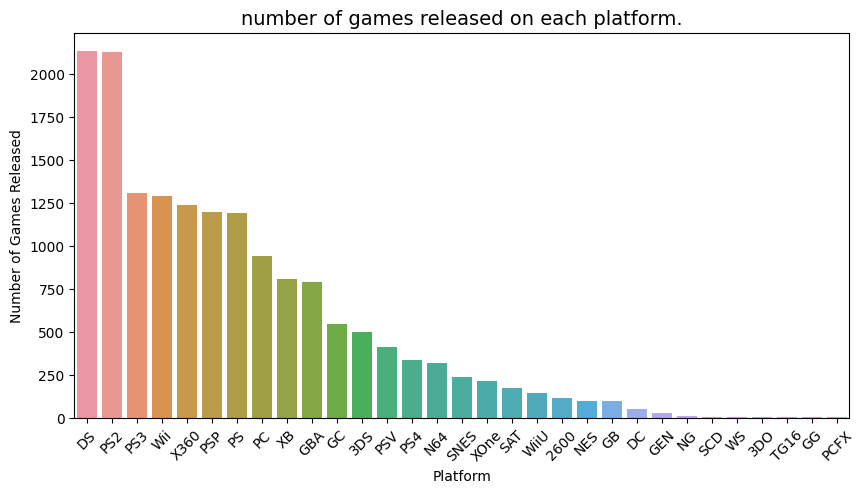

In [17]:
count=cleaned["Platform"].value_counts()
print(count.head(5))
plt.figure(figsize=(10,5))
sns.barplot(x=count.index, y=count.values)
plt.xticks(rotation=45)
plt.title("number of games released on each platform.", fontsize=14)
plt.xlabel("Platform")
plt.ylabel("Number of Games Released")
plt.show()




In [18]:
print("TOP PLATFORM:\n",count.head(1))

TOP PLATFORM:
 Platform
DS    2131
Name: count, dtype: int64



## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


In [19]:
publish=cleaned.groupby("Publisher")["Global_Sales"].sum().reset_index()
toppub=publish.sort_values(by="Global_Sales",ascending=False).head(5)
print(toppub)


                       Publisher  Global_Sales
359                     Nintendo       1784.43
138              Electronic Arts       1093.39
21                    Activision        721.41
455  Sony Computer Entertainment        607.28
524                      Ubisoft        473.54


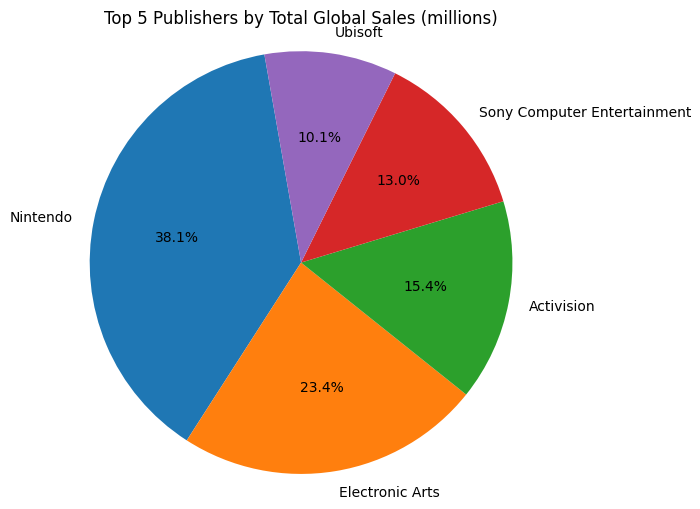

In [20]:
plt.figure(figsize=(6,6))
plt.pie(toppub["Global_Sales"],
        labels=toppub["Publisher"],
        autopct='%1.1f%%',
        startangle=100)
plt.title("Top 5 Publishers by Total Global Sales (millions)")
plt.axis("equal")
plt.show()


## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [21]:
totaleu=cleaned.groupby(["Genre", "Publisher"])["EU_Sales"].sum().reset_index()
champ=totaleu.loc[totaleu.groupby("Genre")["EU_Sales"].idxmax()]

champ = champ.sort_values("Genre")
for i, row in champ.iterrows():
    print(f"{row['Genre']} → {row['Publisher']} (EU Sales: {row['EU_Sales']:.2f}M)")

Action → Take-Two Interactive (EU Sales: 70.44M)
Adventure → Ubisoft (EU Sales: 8.08M)
Fighting → THQ (EU Sales: 20.58M)
Misc → Nintendo (EU Sales: 51.62M)
Platform → Nintendo (EU Sales: 84.90M)
Puzzle → Nintendo (EU Sales: 26.42M)
Racing → Electronic Arts (EU Sales: 51.20M)
Role-Playing → Nintendo (EU Sales: 63.92M)
Shooter → Activision (EU Sales: 96.86M)
Simulation → Electronic Arts (EU Sales: 35.83M)
Sports → Electronic Arts (EU Sales: 144.14M)
Strategy → Activision (EU Sales: 7.94M)



## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



In [22]:
nin=cleaned[cleaned["Publisher"]=="Nintendo"].sort_values(
    by="Global_Sales",ascending=False)

years=nin.groupby(["Year",])["Global_Sales"].sum().reset_index()
#print(years)

topsales=years.sort_values(by="Global_Sales",ascending=False)
print(topsales.head(1))



    Year  Global_Sales
23  2006        205.61



## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



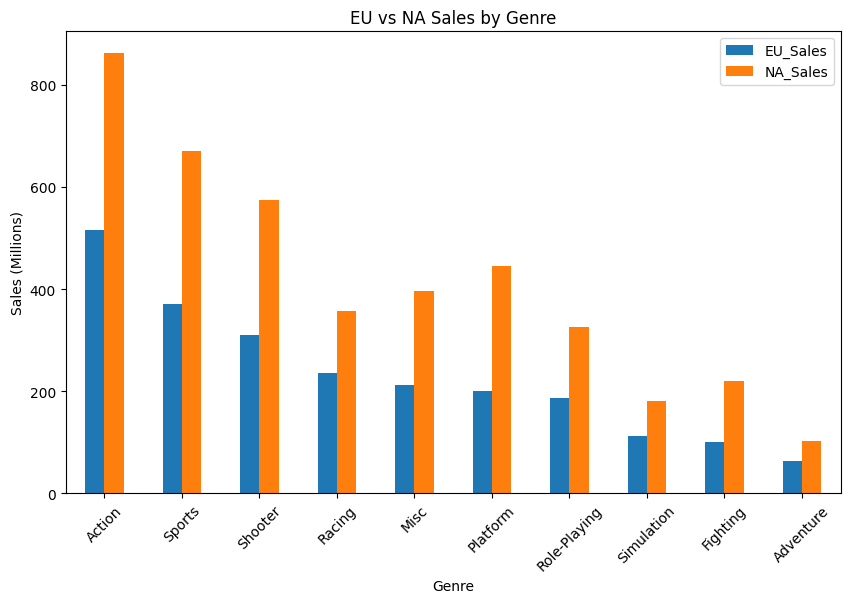

In [23]:
sales = cleaned.groupby("Genre")[["EU_Sales","NA_Sales"]].sum().sort_values("EU_Sales", ascending=False)

sales.head(10).plot(kind="bar", figsize=(10,6))
plt.title("EU vs NA Sales by Genre")
plt.ylabel("Sales (Millions)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()
